In [36]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score

In [37]:
train_data = pd.read_csv("train.csv")
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [38]:
X = train_data.drop("Survived", axis=1)
y = train_data["Survived"]

In [39]:
X_train.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [40]:
y_train.head(3)

0    0
1    1
2    1
Name: Survived, dtype: int64

In [41]:
numeric_features = ["Age", "Fare"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
categorical_features = ["Sex", "Embarked"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
])

In [42]:
X_preprocessed = preprocessor.fit_transform(X)

In [43]:
dt_classifier = DecisionTreeClassifier(random_state=42)

In [44]:
dt_classifier.fit(X_preprocessed, y)


DecisionTreeClassifier(random_state=42)

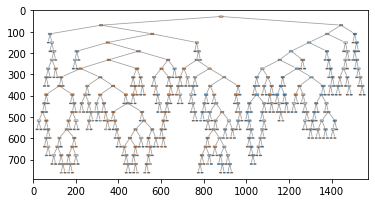

In [45]:
img = mpimg.imread('tree1.png')
imgplot = plt.imshow(img)
plt.show()

In [46]:
dt_cv_scores = cross_val_score(dt_classifier, X_preprocessed, y, cv=5)


In [47]:
dt_avg_accuracy = dt_cv_scores.mean()
print("Average Classification Accuracy (Decision Tree):", dt_avg_accuracy)

Average Classification Accuracy (Decision Tree): 0.764358797313414


In [48]:
from sklearn.ensemble import RandomForestClassifier


In [49]:
rf_classifier = RandomForestClassifier(random_state=42)


In [50]:
rf_cv_scores = cross_val_score(rf_classifier, X_preprocessed, y, cv=5)


In [51]:
rf_avg_accuracy = rf_cv_scores.mean()
print("Average Classification Accuracy (Random Forest):", rf_avg_accuracy)

Average Classification Accuracy (Random Forest): 0.7688155169167032
